# Imports

In [1]:
from pybaseball import spraychart
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
judge = pd.read_csv('../data/aaron-judge.csv')
judge.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(judge.shape)
judge.head(2)

(2654, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss
0,CH,2021-10-03,88.0,-1.53,6.43,"Judge, Aaron",592450,608379,strikeout,swinging_strike,8.0,Aaron Judge strikes out swinging.,R,R,R,NYY,TB,S,2.0,NaN,2,2,2021,-1.05,9.60,0.07,2.20,NaN,NaN,650402.0,1,4,Bot,NaN,NaN,572287,6.113408,-128.009023,-5.893985,-12.80959,25.089781,-22.376724,3.76,1.75,NaN,NaN,NaN,88.9,1606.0,6.8,632239,608379,572287,596847,664040,621563,677551,640457,595281,668227,53.73,NaN,NaN,0.0,1.0,0.0,0.0,NaN,29,5,Changeup,0,0,0,0,0,0,0,0,Standard,Standard,239.0,-0.034,-0.261,1,2-2,-0.07,12.60,1
1,SI,2021-10-03,95.8,-1.51,6.34,"Judge, Aaron",592450,608379,NaN,foul,1.0,Aaron Judge strikes out swinging.,R,R,R,NYY,TB,S,NaN,NaN,2,1,2021,-1.17,14.64,-0.54,3.67,NaN,NaN,650402.0,1,4,Bot,NaN,NaN,572287,5.250206,-139.424963,-4.213709,-16.45265,31.598568,-15.517699,3.76,1.75,231.0,76.5,27.0,96.5,2074.0,6.7,632239,608379,572287,596847,664040,621563,677551,640457,595281,668227,53.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,4,Sinker,0,0,0,0,0,0,0,0,Standard,Standard,209.0,0.000,-0.096,1,2-1,0.54,14.04,0


In [3]:
zero_zero = judge.loc[(judge['pitch_count'] == '0-0')]
zero_zero.description.value_counts()

ball               253
called_strike      174
foul                84
swinging_strike     60
hit_into_play       58
hit_by_pitch         2
Name: description, dtype: int64

In [4]:
# Feature engineer first_pitch_take column by taking count and if pitch was called a strike
judge['first_pitch_take'] = [1 if x == '0-0' and y == 'called_strike' else 0 for (x, y) 
                                in zip(judge['pitch_count'], 
                                       judge['description'])]

# feature engineer first_pitch_swing column by taking count, if launch speed is > 0 or if swing_miss = 1
judge['first_pitch_swing'] = [1 if x == '0-0' and (y > 0 or z > 0) else 0 for (x, y, z) 
                                 in zip(judge['pitch_count'], 
                                        judge['launch_speed'],
                                        judge['swing_miss'])]

In [5]:
judge.groupby(['bb_type']).mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss,first_pitch_take,first_pitch_swing
bb_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fly_ball,87.916514,-0.325138,5.877248,592450.0,600825.054054,5.862385,8.328947,1.405405,1.171171,2021.0,0.161560,7.838532,-0.031101,2.731468,584931.571429,541470.80000,522050.555556,1.000000,4.126126,146.144865,74.151712,596641.675676,0.425581,-127.900650,-2.915205,1.205467,26.939272,-23.532491,3.760000,1.750000,335.944954,96.825688,35.770642,87.944037,2289.027523,6.350459,633362.207207,600825.054054,596641.675676,621155.162162,609369.216216,615435.963964,617441.891892,638708.369369,617863.756757,617114.945946,54.147706,0.401734,0.737477,0.670721,1.0,0.054054,0.945946,4.440367,31.639640,3.819820,1.810811,1.891892,1.693694,2.009009,2.189189,2.036036,2.216216,2.009009,156.678899,-0.009144,0.306468,1.0,0.031101,-1.938716,0.0,0.0,0.144144
ground_ball,89.306627,-0.815241,5.714217,592450.0,599673.431138,7.656627,5.281437,1.305389,1.191617,2021.0,-0.248855,6.466988,-0.053976,2.427470,564538.933333,529924.62069,529875.288462,1.000000,4.604790,113.390539,147.253054,595936.233533,2.432285,-129.893427,-3.223818,-3.784005,27.309498,-24.974446,3.760000,1.750000,37.355422,93.259036,-9.945783,89.400000,2176.704819,6.369880,633347.520958,599673.431138,595936.233533,617602.622754,603928.455090,619348.688623,619194.502994,633253.766467,610295.922156,616417.053892,54.131145,0.287614,0.266042,0.243413,1.0,0.239521,0.017964,2.506024,34.772455,3.610778,1.658683,2.035928,1.874251,1.820359,2.077844,1.676647,1.934132,1.820359,179.963855,-0.004305,-0.073934,1.0,0.053976,2.986265,0.0,0.0,0.131737
line_drive,89.715741,-0.662222,5.755556,592450.0,601732.416667,6.611111,7.601942,1.305556,1.240741,2021.0,-0.092500,6.943333,0.031389,2.606204,533871.666667,543361.35000,520302.805556,0.916667,4.759259,125.123796,91.719352,600999.462963,1.960590,-130.516122,-3.080434,-1.901718,27.409764,-24.213701,3.758056,1.748889,262.444444,100.113889,15.157407,89.766667,2269.648148,6.319444,633489.981481,601732.416667,600999.462963,610489.000000,608250.009259,615170.907407,617952.722222,627175.009259,611701.833333,615381.750000,54.182963,0.700944,0.757398,0.742593,1.0,0.657407,0.305556,4.592593,35.472222,3.759259,1.675926,1.777778,1.805556,1.648148,1.925926,1.777778,2.055556,1.648148,176.398148,-0.008731,0.363972,1.0,-0.031389,1.110000,0.0,0.0,0.166667
popup,85.881818,-0.495455,5.715455,592450.0,615253.636364,5.545455,3.454545,1.272727,1.181818,2021.0,0.053636,10.058182,-0.260000,2.895455,564107.000000,549590.00000,596142.000000,1.000000,5.000000,158.723636,153.068182,607826.090909,0.578087,-124.951673,-2.154133,0.200268,25.002749,-22.621776,3.760000,1.750000,149.636364,82.500000,61.181818,86.109091,1966.363636,6.400000,633181.909091,615253.636364,607826.090909,638780.545455,584573.818182,616463.727273,605279.727273,627671.272727,614582.363636,614862.090909,54.084545,0.065000,0.059818,0.163636,1.0,0.181818,0.000000,2.818182,38.909091,3.727273,2.454545,2.909091,2.363636,3.000000,2.909091,2.454545,2.363636,3.000000,159.818182,0.006273,-0.158545,1.0,0.260000,-0.643636,0.0,0.0,0.181818


In [6]:
judge.pitch_type.value_counts(normalize = True)

FF    0.275731
SL    0.263578
SI    0.164831
CH    0.130649
FC    0.070262
CU    0.064565
FS    0.018610
KC    0.011394
CS    0.000380
Name: pitch_type, dtype: float64

In [7]:
full_count = judge.loc[judge['pitch_count'] == '3-2']
r_judge = judge.loc[judge['p_throws'] == 'R']
l_judge = judge.loc[judge['p_throws'] == 'L']

ff = judge.loc[judge['pitch_type'] == 'FF']
sl = judge.loc[judge['pitch_type'] == 'SL']
si = judge.loc[judge['pitch_type'] == 'SI']
ch = judge.loc[judge['pitch_type'] == 'CH']
fc = judge.loc[judge['pitch_type'] == 'FC']
cu = judge.loc[judge['pitch_type'] == 'CU']
fs = judge.loc[judge['pitch_type'] == 'FS']
kc = judge.loc[judge['pitch_type'] == 'KC']
cs = judge.loc[judge['pitch_type'] == 'CS']

r_ff = judge.loc[(judge['pitch_type'] == 'FF') & (judge['p_throws'] == 'R')]
r_sl = judge.loc[(judge['pitch_type'] == 'SL') & (judge['p_throws'] == 'R')]
r_si = judge.loc[(judge['pitch_type'] == 'SI') & (judge['p_throws'] == 'R')]
r_ch = judge.loc[(judge['pitch_type'] == 'CH') & (judge['p_throws'] == 'R')]
r_fc = judge.loc[(judge['pitch_type'] == 'FC') & (judge['p_throws'] == 'R')]
r_cu = judge.loc[(judge['pitch_type'] == 'CU') & (judge['p_throws'] == 'R')]
r_fs = judge.loc[(judge['pitch_type'] == 'FS') & (judge['p_throws'] == 'R')]
r_kc = judge.loc[(judge['pitch_type'] == 'KC') & (judge['p_throws'] == 'R')]
r_cs = judge.loc[(judge['pitch_type'] == 'CS') & (judge['p_throws'] == 'R')]

l_ff = judge.loc[(judge['pitch_type'] == 'FF') & (judge['p_throws'] == 'L')]
l_sl = judge.loc[(judge['pitch_type'] == 'SL') & (judge['p_throws'] == 'L')]
l_si = judge.loc[(judge['pitch_type'] == 'SI') & (judge['p_throws'] == 'L')]
l_ch = judge.loc[(judge['pitch_type'] == 'CH') & (judge['p_throws'] == 'L')]
l_fc = judge.loc[(judge['pitch_type'] == 'FC') & (judge['p_throws'] == 'L')]
l_cu = judge.loc[(judge['pitch_type'] == 'CU') & (judge['p_throws'] == 'L')]
l_fs = judge.loc[(judge['pitch_type'] == 'FS') & (judge['p_throws'] == 'L')]
l_kc = judge.loc[(judge['pitch_type'] == 'KC') & (judge['p_throws'] == 'L')]
l_cs = judge.loc[(judge['pitch_type'] == 'CS') & (judge['p_throws'] == 'L')]

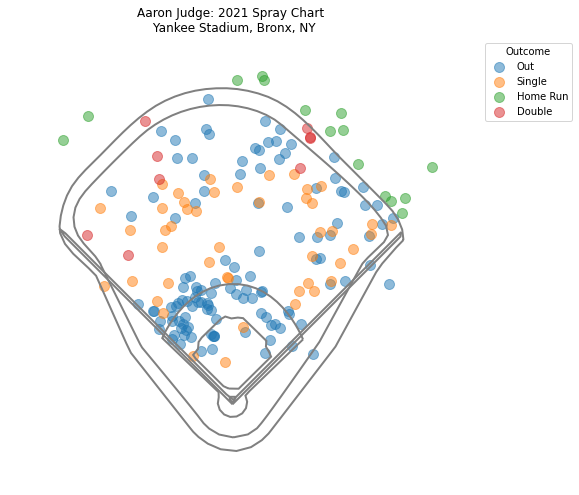

In [8]:
spray_ny = judge[judge['home_team'] == 'NYY']
spray_ny = spray_ny.loc[spray_ny['events'] != 'double_play']
spraychart(spray_ny, 'yankees', title = 'Aaron Judge: 2021 Spray Chart \n Yankee Stadium, Bronx, NY');

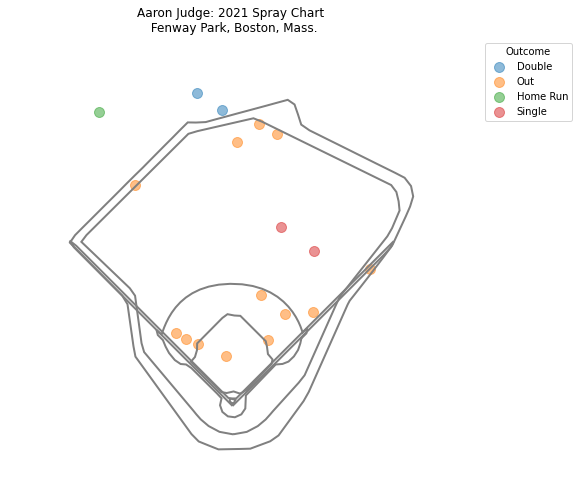

In [9]:
spray_bos = judge[judge['home_team'] == 'BOS']
spraychart(spray_bos, 'red_sox', title = 'Aaron Judge: 2021 Spray Chart \n Fenway Park, Boston, Mass.');

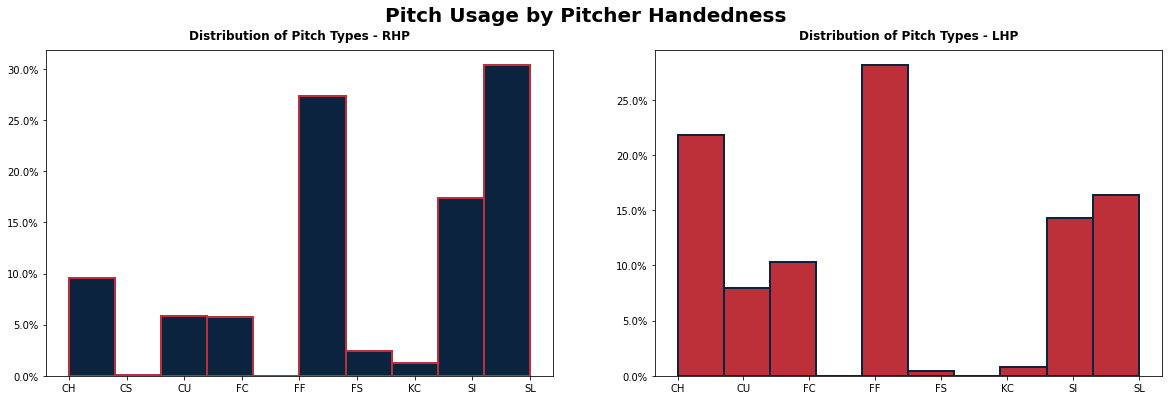

In [10]:
r_judge.dropna(subset=['pitch_type'], inplace = True)
l_judge.dropna(subset=['pitch_type'], inplace = True)

red = '#BD3039'
blue = '#0C2340'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Pitcher Handedness', fontsize = 20, fontweight = 'bold')

dist_r = r_judge.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue, edgecolor = red, linewidth = 2)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHP', fontdict = font_title, pad = 15)

dist_l = l_judge.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red, edgecolor = blue, linewidth = 2)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHP', fontdict = font_title, pad = 15);

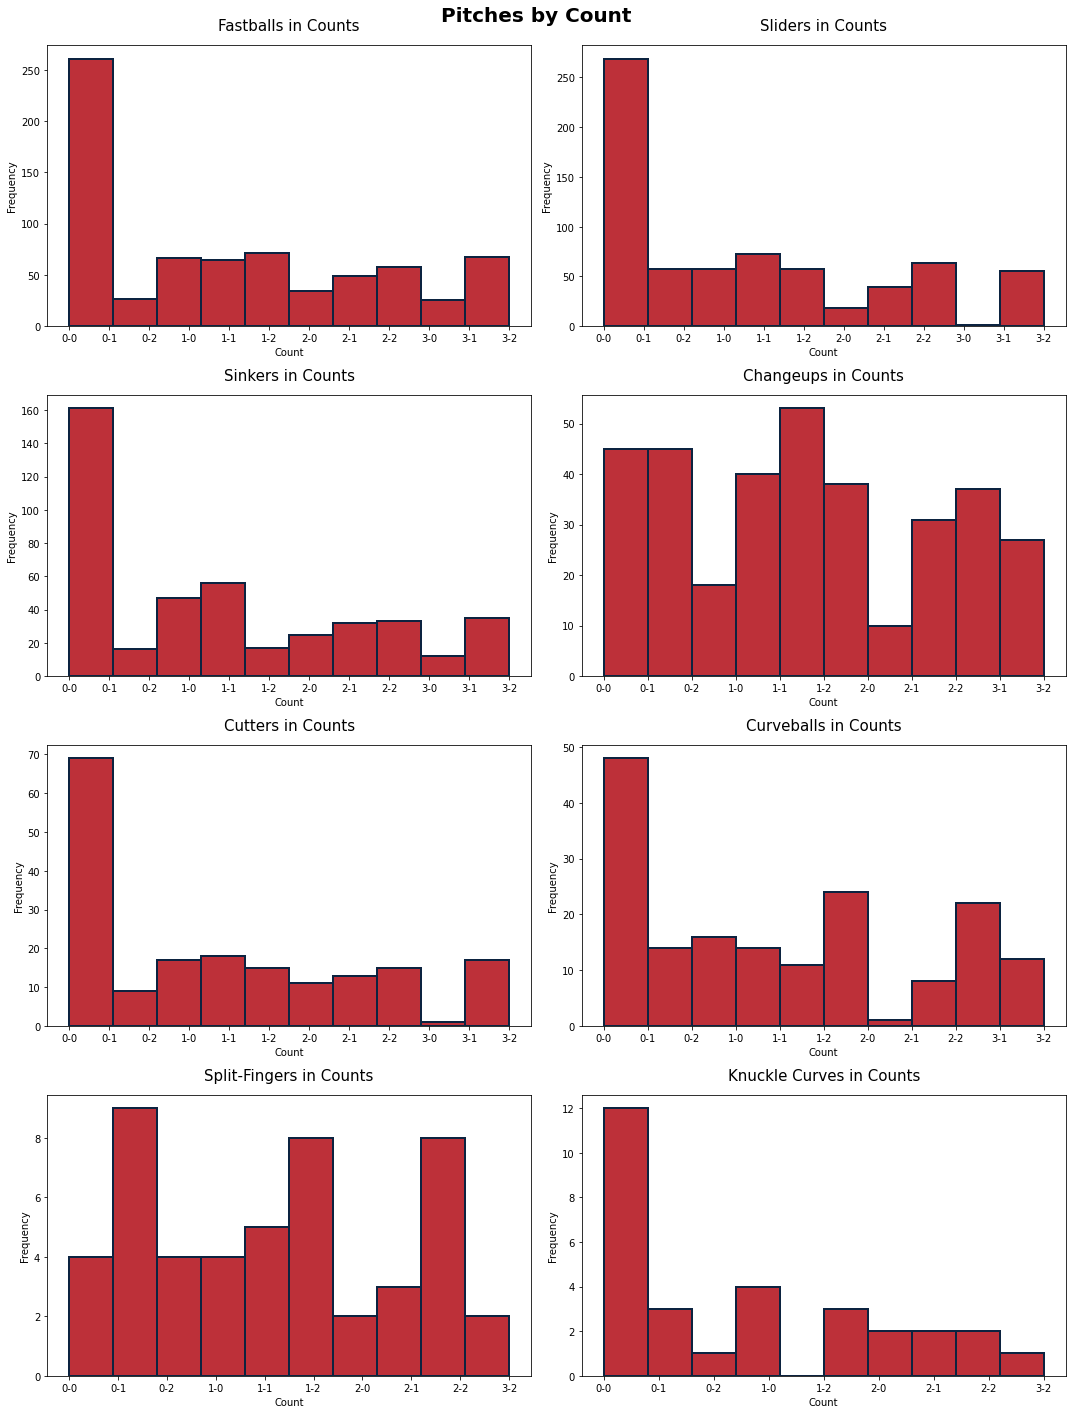

In [11]:
fig, axs = plt.subplots(4, 2, figsize = (15, 20))
fig.suptitle('Pitches by Count', fontsize = 20, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')

axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[0][0].set_title('Fastballs in Counts', fontsize = 15, pad = 15)

axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[0][1].set_title('Sliders in Counts', fontsize = 15, pad = 15)

axs[1][0].hist(si['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[1][0].set_title('Sinkers in Counts', fontsize = 15, pad = 15)

axs[1][1].hist(ch['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[1][1].set_title('Changeups in Counts', fontsize = 15, pad = 15)

axs[2][0].hist(fc['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[2][0].set_title('Cutters in Counts', fontsize = 15, pad = 15)

axs[2][1].hist(cu['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[2][1].set_title('Curveballs in Counts', fontsize = 15, pad = 15)

axs[3][0].hist(fs['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[3][0].set_title('Split-Fingers in Counts', fontsize = 15, pad = 15)

axs[3][1].hist(kc['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[3][1].set_title('Knuckle Curves in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

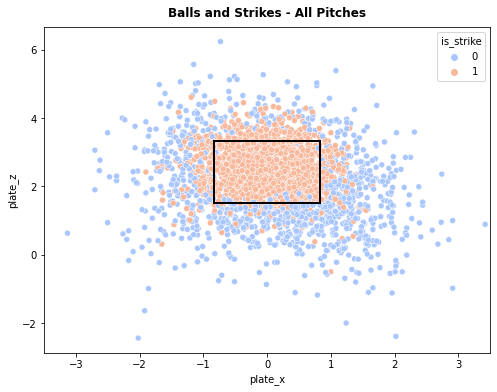

In [12]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = judge, x = 'plate_x', y = 'plate_z', hue = 'is_strike', palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Fastball Heatmaps

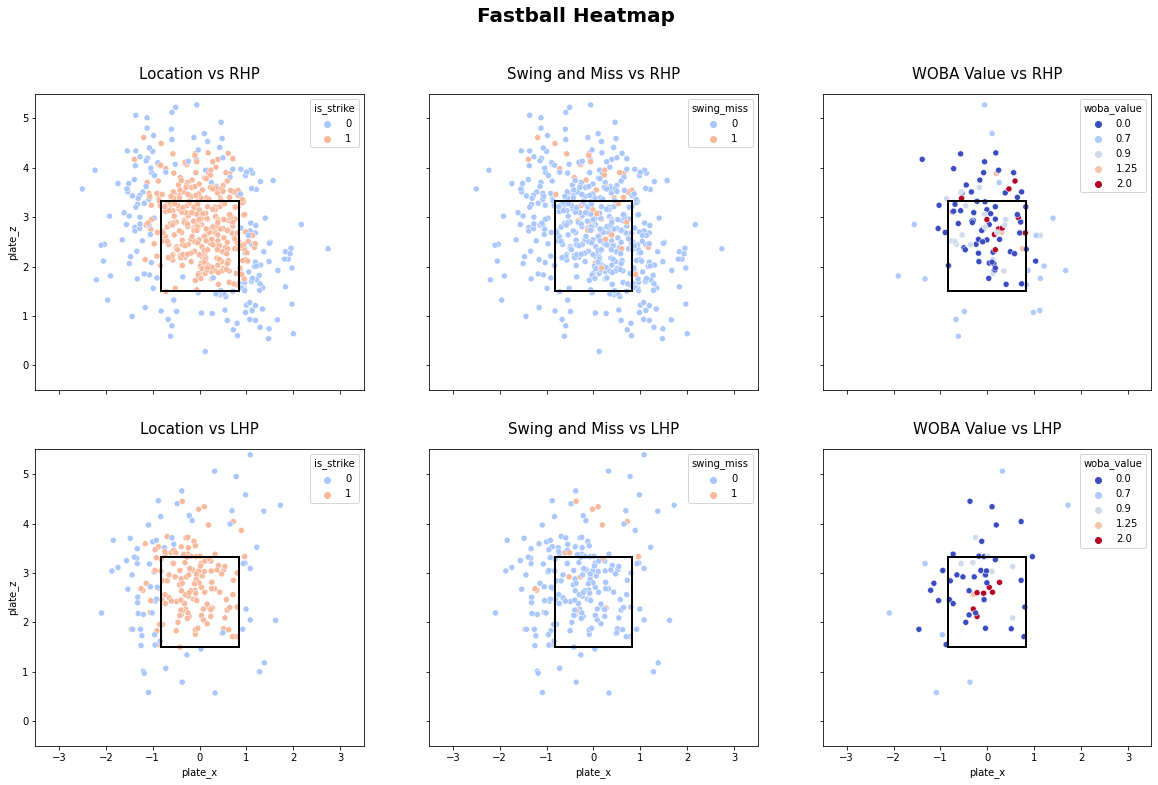

In [13]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);

### Slider Heatmaps

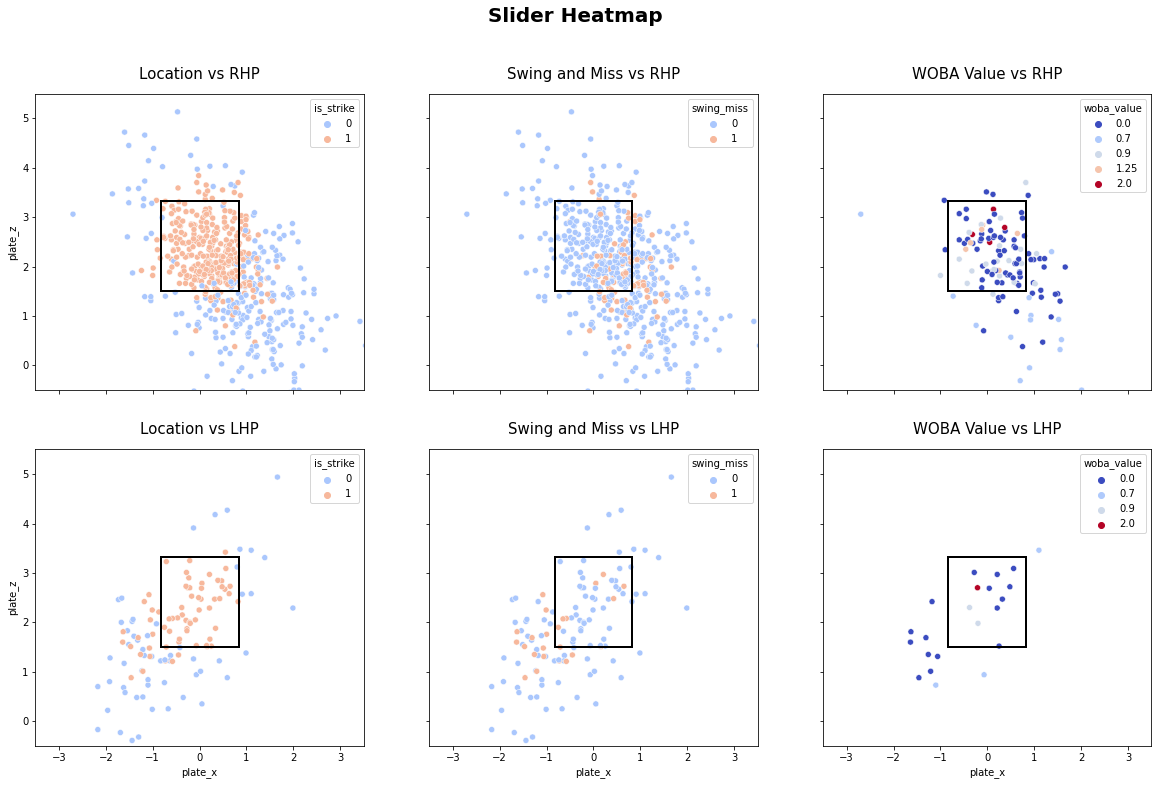

In [14]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);

### Sinker Heatmaps

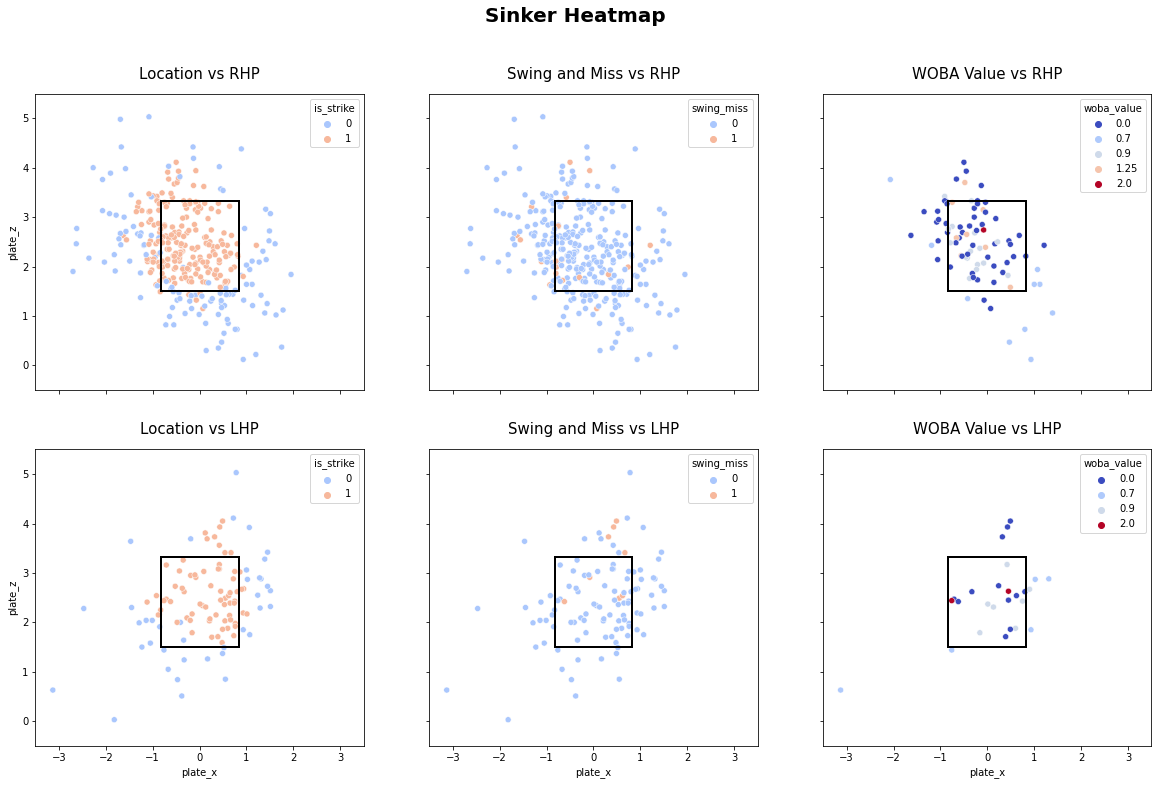

In [15]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);

### Changeup Heatmaps

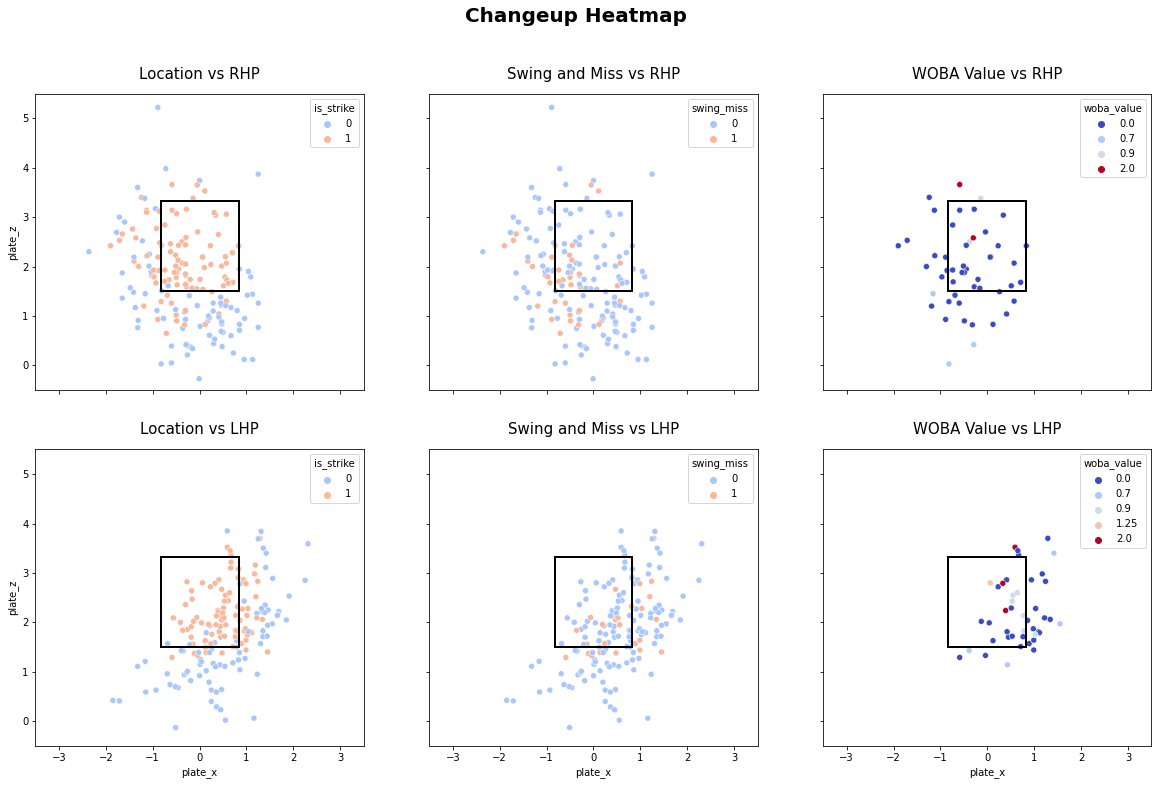

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);

### Cutter Heatmaps

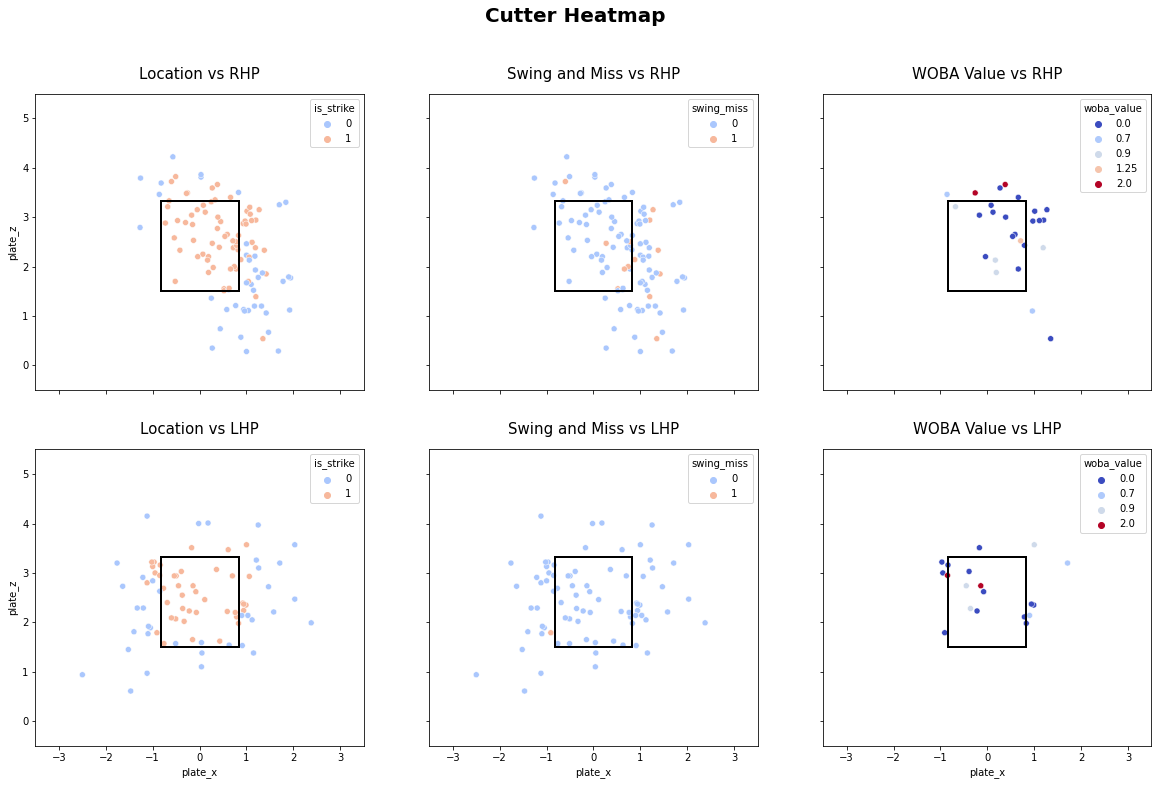

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);

### Curveball Heatmaps

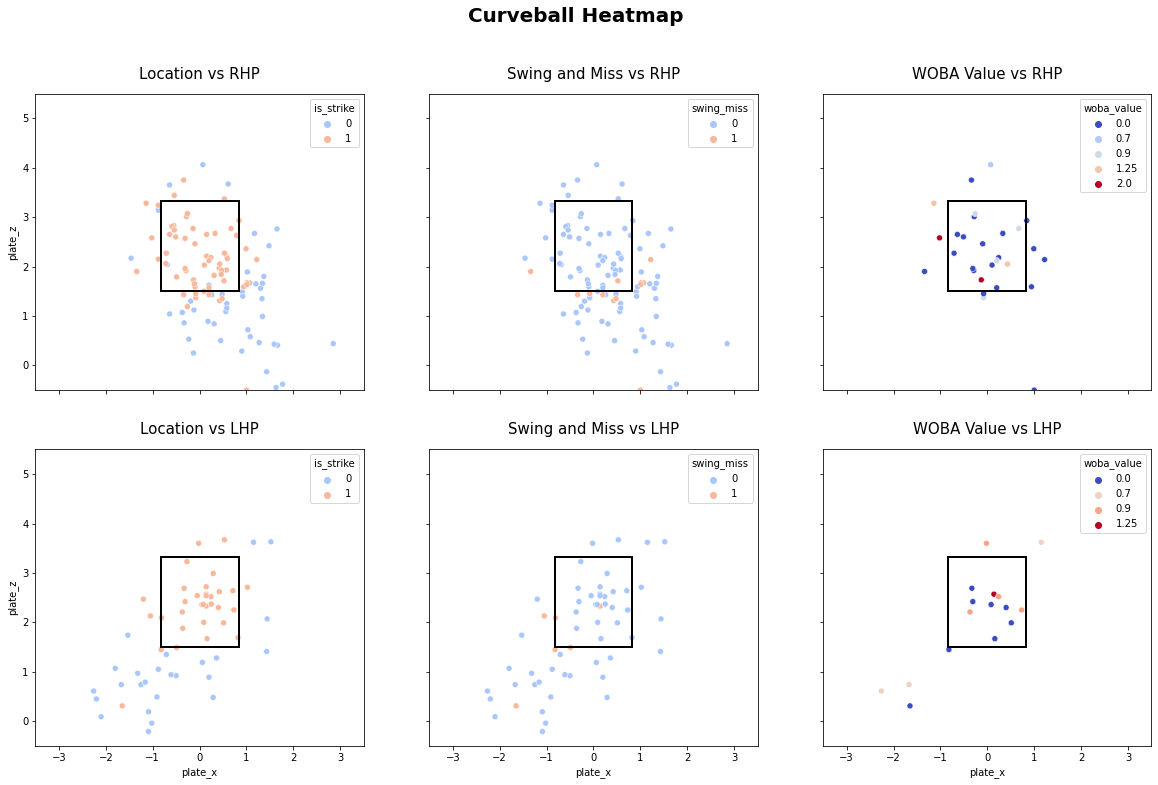

In [18]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);


### Split-Finger Heatmaps

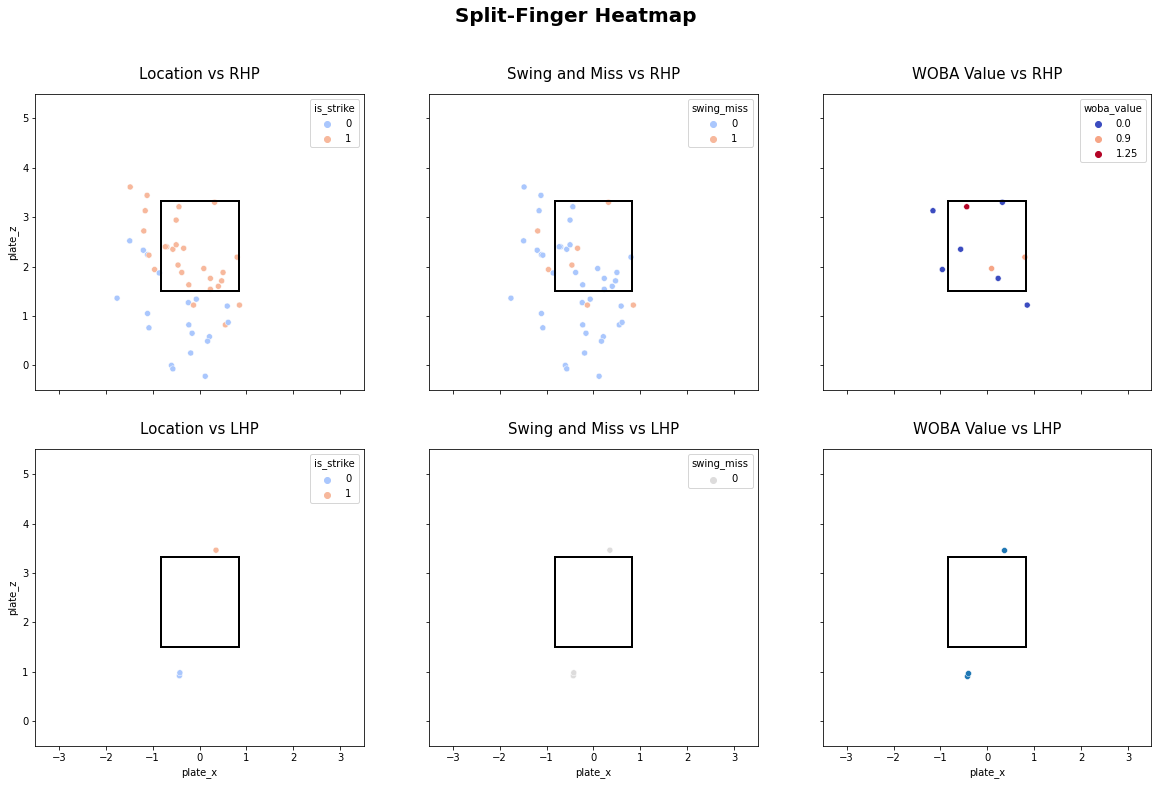

In [19]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);

### Knuckle Curve Heatmaps

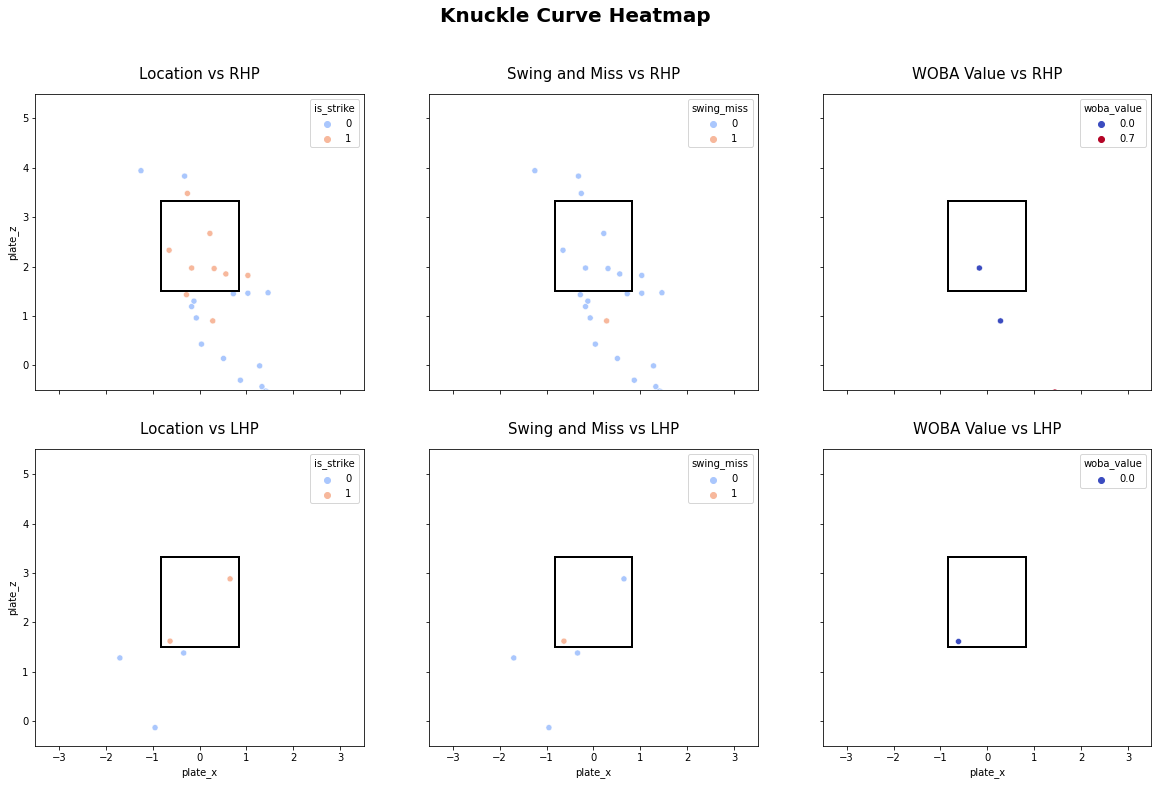

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);

### Slow Curve Heatmaps

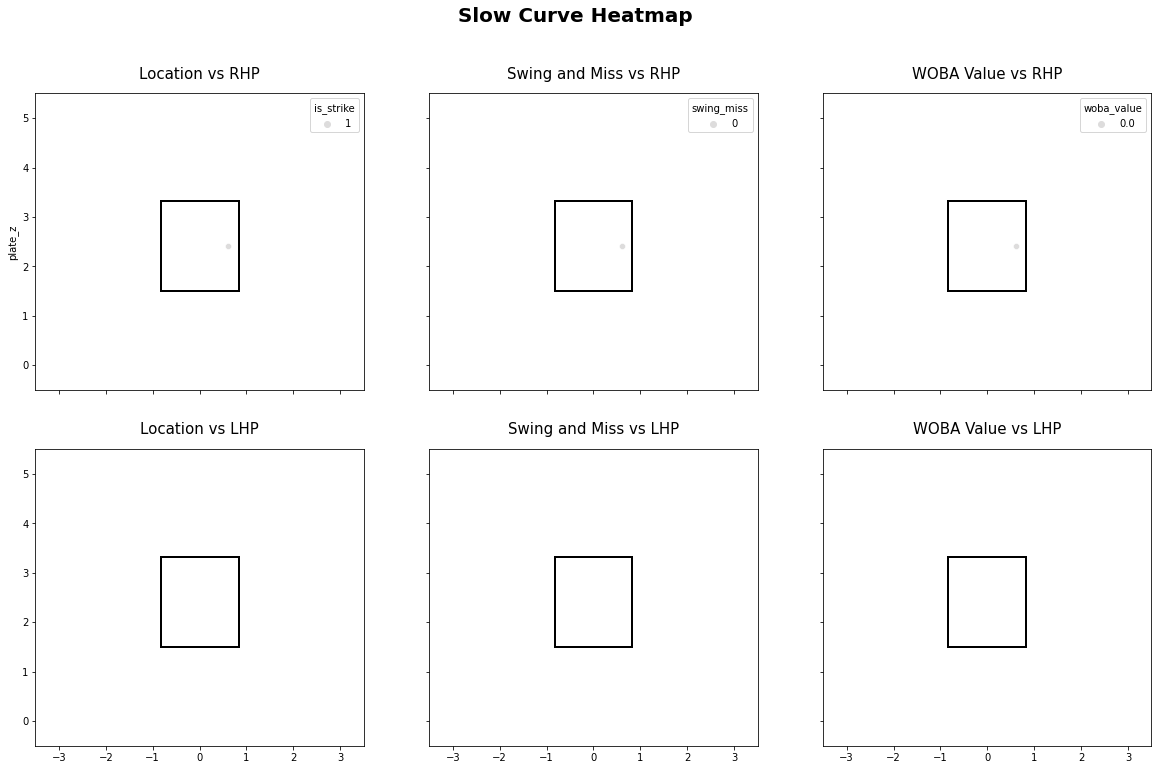

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slow Curve Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHP', fontsize = 15, pad = 15);